In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow transformers nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.7 MB/s eta 0:00:00


# initialization

In [ ]:
import sqlite3
import pandas as pd

# Establish a connection to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/done/article_content/capstone.db')

# Define your SQL query to retrieve data from a specific table
query = "SELECT * FROM WSJ_articles_ESP500_2012_2022"

# Use Pandas to read data from the database and create a DataFrame
df = pd.read_sql_query(query, conn)
# df = df.dropna()

# Close the database connection
conn.close()

# Now you can work with the 'df' DataFrame, which contains your SQLite data
print(df.head())  # Display the first few rows of the DataFrame


    article_id trade_datetime_local         Business_Day   category_tags  \
0  2012_000000  2012-01-01 00:01:00  2012-01-03 00:00:00     MarketWatch   
1  2012_000001  2012-01-01 00:01:00  2012-01-03 00:00:00  The Aggregator   
2  2012_000002  2012-01-01 00:01:00  2012-01-03 00:00:00       Mega Meal   
3  2012_000003  2012-01-01 00:01:00  2012-01-03 00:00:00   Ask Dow Jones   
4  2012_000004  2012-01-01 00:01:00  2012-01-03 00:00:00          Sports   

                                           title  \
0  Job Seekers, Creativity and Flexibility Count   
1   Conquering a To-Do List That's Too Ambitious   
2                Indian Snacks That Pack a Punch   
3             What Is the Payroll Tax Reduction?   
4            Premier League Enters Twilight Zone   

                                          paragraphs                 Date  \
0  In 2012, creativity and adaptability will be k...  2012-01-03 00:00:00   
1  The first item on a highly successful to-do li...  2012-01-03 00:00:00   

# Continue

In [ ]:
# import sqlite3
# import pandas as pd

# def read_sqlite(conn_path, table_name):

#     # Define your SQL query to retrieve data from a specific table
#     query = "SELECT * FROM %s" %(table_name)
#     with sqlite3.connect(conn_path) as conn:
#         df = pd.read_sql_query(query, conn)

#     return df

# conn_path = '/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/done/article_content/capstone.db'
# table_name = 'WSJ_articles_FinBERT'
# table_name_backup = 'WSJ_articles_FinBERT_back'


# df1 = read_sqlite(conn_path, table_name)
# df2 = read_sqlite(conn_path, table_name_backup)


# if len(df1) >= len(df2):

#     df = df1

# else:
#     df = df2


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
summary = df.describe(include='all')
# 1. Check for Null Values in All Columns
null_values = df.isnull().sum()

# Print the summary statistics
print(summary)
print("null_values: ", null_values)


         article_id trade_datetime_local         Business_Day category_tags  \
count        542714               542714               542714        542714   
unique       542714               466240                 2829          3257   
top     2012_000000  2012-01-27 00:01:00  2013-04-01 00:00:00      Business   
freq              1                  151                  511         42965   
mean            NaN                  NaN                  NaN           NaN   
std             NaN                  NaN                  NaN           NaN   
min             NaN                  NaN                  NaN           NaN   
25%             NaN                  NaN                  NaN           NaN   
50%             NaN                  NaN                  NaN           NaN   
75%             NaN                  NaN                  NaN           NaN   
max             NaN                  NaN                  NaN           NaN   

              title paragraphs                 Date

# Data Cleaning

In [ ]:
# version 4
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define your list of stopwords
stopwords = set(nltk.corpus.stopwords.words("english"))
lem = WordNetLemmatizer()

def clean_text(text):
    # All lower case
    text = text.lower()

    # Remove brackets
    text = re.sub(r'[\(\[].*?[\)\]]', r' ', text)

    # Removal of HTTP links/URLs
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)
                     (?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)
                     |[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

    # Tokenize the text using white space as the separator
    text_tokens = text.split()  # Split by white space

    # Remove stopwords
    filtered_tokens = [token for token in text_tokens if token.lower() not in stopwords]
    filtered_text = " ".join(filtered_tokens)

    # Remove non-alphanumeric characters
    text = re.sub(r'\d+', r'', filtered_text)
    text = re.sub(r'\W+', r' ', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'“|”|’|\.|,|&', ' ', text)

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', '', text)

    # Remove single letters
    text = re.sub(r'\b[a-z]\b', '', text)

    # Replace multiple spaces with single spaces
    text = ' '.join(text.split())

    return text

# Apply the clean_text function to the 'article' column of the DataFrame
df['processed_article'] = df['article'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['processed_article'][0:10]

0    job seekers creativity flexibility count creat...
1    conquering to do list that ambitious first ite...
2    indian snacks pack punch best approach street ...
3    payroll tax reduction hear much reducing payro...
4    premier league enters twilight zone manchester...
5    hovnanian faces tough times nation housing mar...
6    taking nonprofit route launching career friend...
7    time magic ball forecast time annual economic ...
8    new year resolutions ve never fan new year res...
9    investing landscape could rough year surprises...
Name: processed_article, dtype: object

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
summary = df.describe(include='all')
# 1. Check for Null Values in All Columns
null_values = df.isnull().sum()

# Print the summary statistics
print(summary)
print("null_values: ", null_values)


         article_id trade_datetime_local         Business_Day category_tags  \
count        542714               542714               542714        542714   
unique       542714               466240                 2829          3257   
top     2012_000000  2012-01-27 00:01:00  2013-04-01 00:00:00      Business   
freq              1                  151                  511         42965   
mean            NaN                  NaN                  NaN           NaN   
std             NaN                  NaN                  NaN           NaN   
min             NaN                  NaN                  NaN           NaN   
25%             NaN                  NaN                  NaN           NaN   
50%             NaN                  NaN                  NaN           NaN   
75%             NaN                  NaN                  NaN           NaN   
max             NaN                  NaN                  NaN           NaN   

              title paragraphs                 Date

# Transfer learning

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
import time
from datetime import datetime, timezone


def save_to_sqlite(df, conn_path, table_name):
    # Use a context manager to handle the connection
    with sqlite3.connect(conn_path) as conn:
        df.to_sql(table_name, conn, if_exists='replace', index=False)

    save_time = time.time()
    save_time_datetime = datetime.fromtimestamp(save_time, tz=timezone.utc)
    save_time_str = save_time_datetime.strftime('%Y-%m-%d %H:%M:%S')

    print("DataFrame has been saved on %s" % save_time_str)





conn_path = '/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/done/article_content/capstone.db'
table_name = 'WSJ_articles_FinBERT'
table_name_backup = 'WSJ_articles_FinBERT_back'


# Load the FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")


start_time = time.time()
start_time_datetime = datetime.fromtimestamp(start_time, tz=timezone.utc)
start_time_str = start_time_datetime.strftime('%Y-%m-%d %H:%M:%S')
print("start_time: ", start_time_str)

counter = 0
# Calculate sentiment scores for each row
for index, row in df.iterrows():
    try:
        if row['check'] == 'N':

            article = row['processed_article']
            sentiment = pipeline("text-classification", model=model, tokenizer=tokenizer)(article)

            # Check if there are results
            if sentiment:
                # print(article)
                # print(sentiment)
                # Extract the label and score
                label = sentiment[0]['label']
                score = sentiment[0]['score']

                # Assign these values to the respective columns
                df.at[index, label.lower()] = score

            df.at[index, 'check'] = 'Y'

            counter += 1
            print(counter)
            if counter % 10000 == 0:
                save_to_sqlite(df, conn_path, table_name_backup)
                print("Has processed %s rows" % (counter))

            if counter % 5000 == 0:
                save_to_sqlite(df, conn_path, table_name)
                print("Has processed %s rows" % (counter))

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    finally:
        save_to_sqlite(df, conn_path, table_name)

end_time = time.time()
end_time_datetime = datetime.fromtimestamp(end_time, tz=timezone.utc)
end_time_str = end_time_datetime.strftime('%Y-%m-%d %H:%M:%S')
print("end_time: ", end_time_str)
print("Time used: ", end_time - start_time)

save_to_sqlite(df, conn_path, table_name)
save_to_sqlite(df, conn_path, table_name_backup)


start_time:  2023-10-24 23:05:03


NameError: ignored

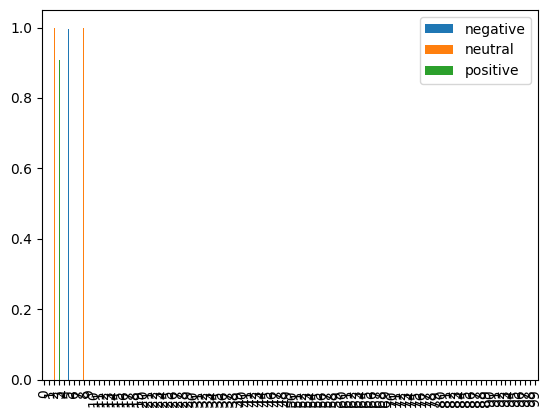

In [ ]:
    # Plot the sentiment scores
    df[:100][['negative', 'neutral', 'positive']].plot(kind='bar')
    plt.show()

In [ ]:
for index, row in df[:100].iterrows():
    if row['negative'] != 0:
        print(row['negative'], row['article'])


0.9965088963508606 Hovnanian Faces More Tough Times . The nation's housing market has lately been showing signs of life, and investors have bid up home builders' stocks by an average of nearly 50% over the past three months. But in the case of Hovnanian Enterprises (HOV), which is up 20% in the same period, investors may have gotten carried away. The big builder, with operations in 17 states, looks to be headed for a severe cash crunch.
0.999847412109375 The Investing Landscape for 2012 Could Be Rough. 2011 was a year of surprises. An Arab revolution no one predicted. A downgrade of the U.S.'s formerly pristine debt rating. European debt troubles that threatened the future of the continent's common currency.


In [ ]:
for index, row in df[:100].iterrows():
    if row['positive'] != 0:
        print(row['positive'], row['article'])

In [ ]:
for index, row in df[:100].iterrows():
    if row['neutral'] != 0:
        print(row['neutral'], row['article'])


In [1]:
! pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b